In [1]:
import pandas as pd
import numpy as np

## data.csv contains the data extracted from the word document

In [2]:
df = pd.read_csv("data2.csv")

In [3]:
df.columns


Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore', 'day',
       'Slowness_in_traffic_percentREAL'],
      dtype='object')

In [4]:
display(df)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,day,Slowness_in_traffic_percentREAL
0,7:00,0,0,T,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,4.1
1,7:30,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,6.6
2,8:00,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,8.7
3,8:30,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,9.2
4,9:00,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,11.1
5,9:30,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,10.9
6,10:00,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,8.3
7,10:30,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,8.2
8,11:00,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,7.6
9,11:30,0,0,F,0.0,0,NO,0,0.0,0,0,0,0,0.0,0,0.0,0,1,6.4


### Importing all the required libraries for data processing

In [5]:
# for handling missing data
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [6]:

X_col = df.iloc[:, :-1].columns
Y_col = ['Slowness_in_traffic_percentREAL']

In [7]:
# Splitting the attributes into independent and dependent attributes
data_X = df.iloc[:, :-1].values # attributes to determine dependent variable / Class
data_Y = df.iloc[:, -1].values # dependent variable / Class

X = pd.DataFrame(data = data_X, columns=X_col) 
Y = pd.DataFrame(data = data_Y, columns=Y_col) 


# DATA Preparation

### Analysis data skew

In [9]:
#getting unique value details of all the features
col = X.columns
for i in col:
  print(i,"*****",X[i].unique())


Hour ***** ['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
Immobilized_bus ***** [0 2 1 4]
Broken_Truck ***** [0 1000 2 1 5 4 3]
Vehicle_excess ***** ['T' 'F' 'f']
Accident_victim ***** [0.0 1.0 2.0 3.0 nan]
Running_over ***** ['0' 'NO' '1' '2' '-1']
Fire_vehicles ***** ['NO' '0' 'YES']
Occurrence_involving_freight ***** [0 1]
Incident_involving_dangerous_freight ***** [0.0 1.0 nan]
Lack_of_electricity ***** [0 1 2 4 3]
Fire ***** ['0' 'a' '1']
Point_of_flooding ***** [0 2000 1 3 7]
Manifestations ***** [0 1 -1]
Defect_in_the_network_of_trolleybuses ***** [0.0 1.0 3.0 2.0 -8.0 nan]
Tree_on_the_road ***** [0 1]
Semaphore_off ***** [0.0 1.0 2.0 4.0 nan]
Intermittent_Semaphore ***** [0 1]
day ***** [1 2 3 4 5]


## Handling Categorical data

In [10]:
X['Fire_vehicles'] = X['Fire_vehicles'].replace('0','NO')

In [11]:
X = pd.get_dummies(X, columns=['Fire_vehicles'], prefix=['fireVehicle'])
# dummy

## Treating Corrupted Values

In [12]:
#removing corrupted data
X = X.replace(['a',2000,1000,'NO'],np.nan)
#removing ForT to 0/1
X = X.replace(['f','F','0'],0)
X = X.replace(['T'],1)
#removing -ve corrupted values
col = ['Running_over','Manifestations','Defect_in_the_network_of_trolleybuses']
for i in col:
      X[i] = X[i].apply(lambda x: 0 if( np.isnan(float(x)) != True and float(x) < 0) else x)

In [13]:
col = X.columns
for i in col:
  print(i,"*****",X[i].unique())

Hour ***** ['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
Immobilized_bus ***** [0 2 1 4]
Broken_Truck ***** [ 0. nan  2.  1.  5.  4.  3.]
Vehicle_excess ***** [1 0]
Accident_victim ***** [ 0.  1.  2.  3. nan]
Running_over ***** [0 nan '1' '2']
Occurrence_involving_freight ***** [0 1]
Incident_involving_dangerous_freight ***** [ 0.  1. nan]
Lack_of_electricity ***** [0 1 2 4 3]
Fire ***** [0 nan '1']
Point_of_flooding ***** [ 0. nan  1.  3.  7.]
Manifestations ***** [0 1]
Defect_in_the_network_of_trolleybuses ***** [ 0.  1.  3.  2. nan]
Tree_on_the_road ***** [0 1]
Semaphore_off ***** [ 0.  1.  2.  4. nan]
Intermittent_Semaphore ***** [0 1]
day ***** [1 2 3 4 5]
fireVehicle_NO ***** [1 0]
fireVehicle_YES ***** [0 1]


## Treating Missing Values

In [14]:
X_array = X.iloc[:, 0:].values

In [15]:
# handling the missing data and replace missing values with nan from numpy and replace with Most frequent of all the other values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
imputer = imputer.fit(X_array[:, 1:].astype(float))
X_array[:, 1:] = imputer.transform(X_array[:, 1:])

In [51]:
X_array[:, 1:] = X_array[:, 1:].astype(int)
X_col = X.columns 
X = pd.DataFrame(data = X_array, columns=X_col) 

In [52]:
X

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,day,fireVehicle_NO,fireVehicle_YES
0,7:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,7:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,8:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,8:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,9:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,9:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6,10:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
7,10:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8,11:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
9,11:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [18]:
print(X.shape)
print(Y.shape)

(140, 19)
(140, 1)


In [19]:
Y

,Slowness_in_traffic_percentREAL
0,4.1
1,6.6
2,8.7
3,9.2
4,11.1
5,10.9
6,8.3
7,8.2
8,7.6
9,6.4


In [54]:
data = pd.concat([X, Y['Slowness_in_traffic_percentREAL']], axis=1)

In [21]:
data.head(5)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,day,fireVehicle_NO,fireVehicle_YES,Slowness_in_traffic_percentREAL
0,7:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4.1
1,7:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,6.6
2,8:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,8.7
3,8:30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,9.2
4,9:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,11.1


In [22]:
data.mean()

Slowness_in_traffic_percentREAL    9.980714
dtype: float64

In [23]:
data.var()

Slowness_in_traffic_percentREAL    18.693366
dtype: float64

## Data Analysis

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


(array([17., 18., 39., 29., 13.,  6.,  4.,  7.,  3.,  4.]),
 array([ 3.4,  5.4,  7.4,  9.4, 11.4, 13.4, 15.4, 17.4, 19.4, 21.4, 23.4]),
 <a list of 10 Patch objects>)

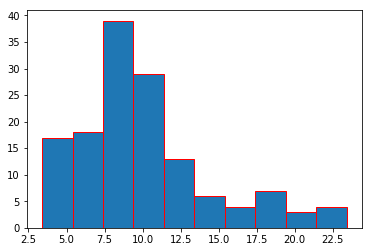

In [25]:
plt.hist(data['Slowness_in_traffic_percentREAL'],edgecolor='red')

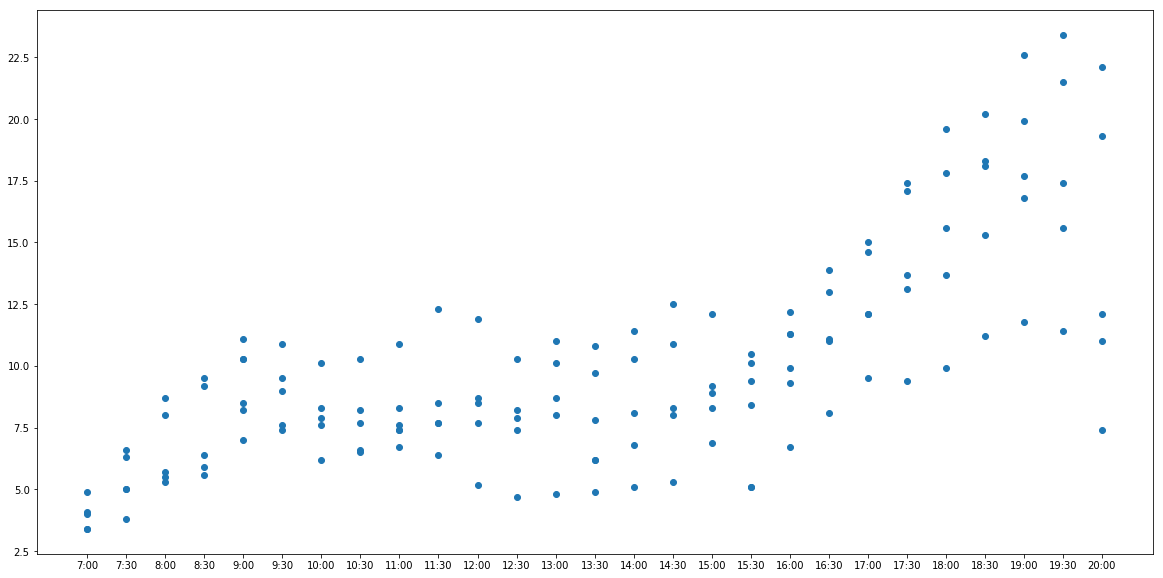

In [26]:
plt.figure(figsize=(20,10))
plt.scatter(data['Hour'],data['Slowness_in_traffic_percentREAL'])

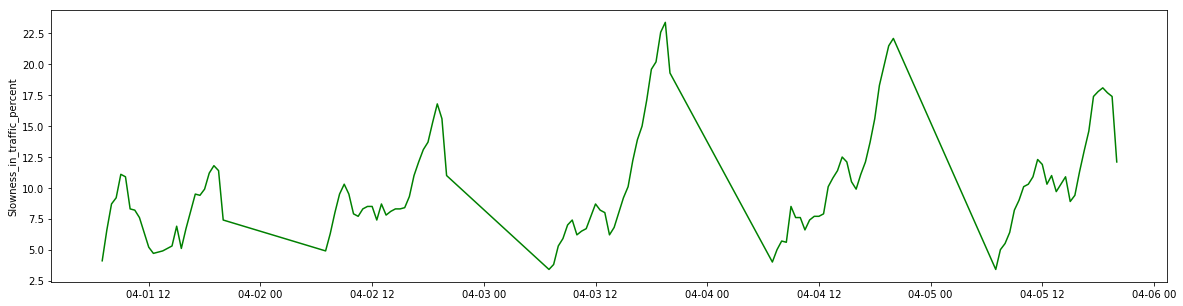

In [138]:
data["Hour"]=data["Hour"].str.replace(':','-')
data["timestamp"] = "2019-04-" + data["day"].astype(str).str.zfill(2) + "-" + data["Hour"].astype(str).str.zfill(2)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d-%H-%M")

# data.head(5)

fig, ax1 = plt.subplots(figsize=(20, 5))
ax1.set(xlabel='', ylabel='Slowness_in_traffic_percent')
ax1.plot(data["timestamp"], data['Slowness_in_traffic_percentREAL'], color='g')
# ax1.plot(data["timestamp"], data.Registered, color='b')

# ax1.xaxis.set(
#     major_locator=mdates.DayLocator(),
#     major_formatter=mdates.DateFormatter("\n\n%A"),
#     minor_locator=mdates.HourLocator((0, 24)),
#     minor_formatter=mdates.DateFormatter("%H"),
# )
plt.show()

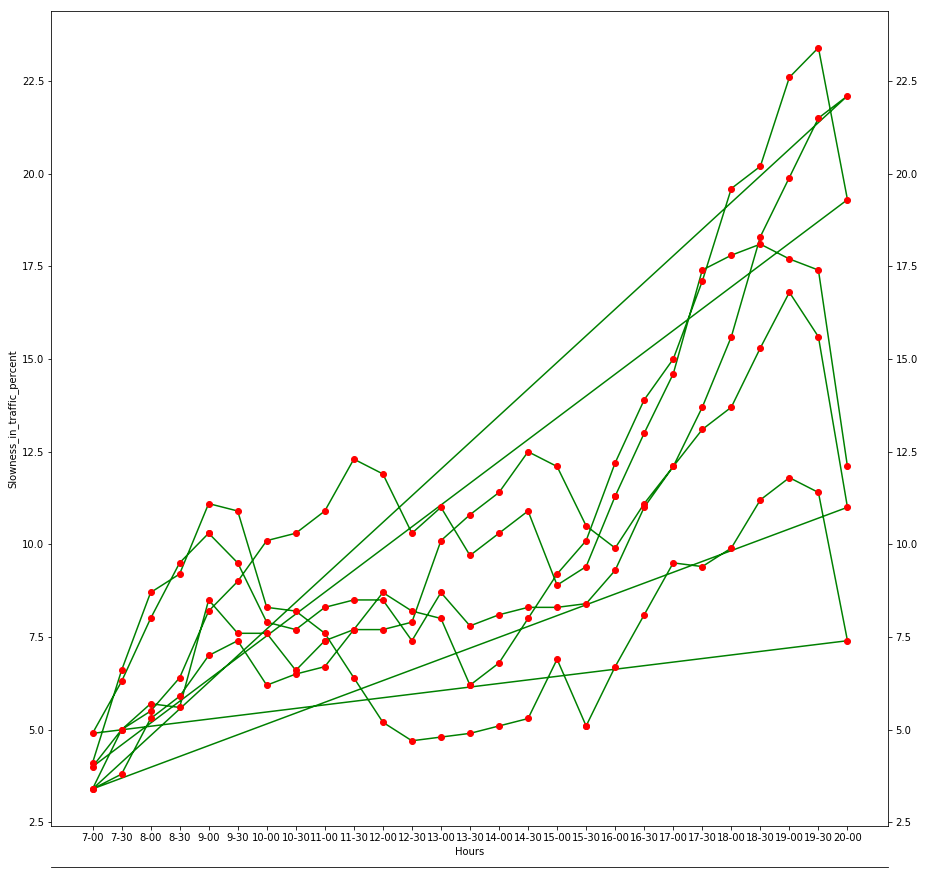

In [47]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, ax1 = plt.subplots(figsize=(15, 15))
ax1.set(xlabel='Hours', ylabel='Slowness_in_traffic_percent')

ax1.plot(data['Hour'],data['Slowness_in_traffic_percentREAL'], color='g')


"""This part is trying to create the 2nd x-axis (Days)"""
ax2 = ax1.twinx()
#offset the bottom spine
ax2.spines['bottom'].set_position(('axes', -.05))
make_patch_spines_invisible(ax2)
#show bottomm spine
ax2.spines['bottom'].set_visible(True)
ax2.set_xlabel("Days")

ax2.scatter(data['Hour'],data['Slowness_in_traffic_percentREAL'], color='red')
plt.show()

## 1.Point_of_flooding

In [55]:
data['Point_of_flooding'].unique()

array([0, 1, 3, 7], dtype=object)

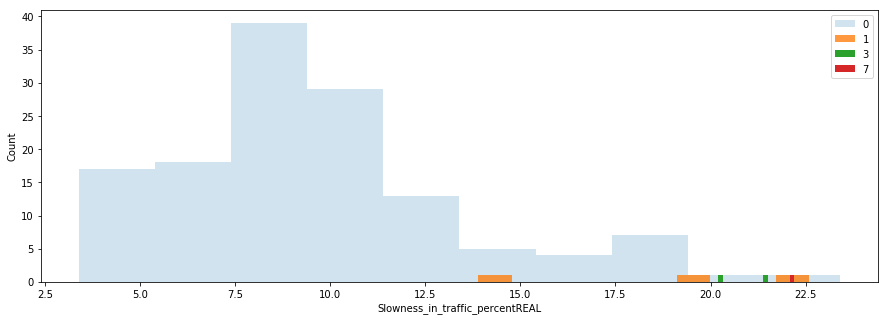

In [70]:
#Point_of_flooding Histogram bin
a = data.loc[data['Point_of_flooding'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Point_of_flooding'] == 1, 'Slowness_in_traffic_percentREAL']
c = data.loc[data['Point_of_flooding'] == 3, 'Slowness_in_traffic_percentREAL']
d = data.loc[data['Point_of_flooding'] == 7, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.hist(c,alpha=1,label='3')
plt.hist(d,alpha=1,label='7')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

## 2.Lack_of_electricity

In [69]:
data['Lack_of_electricity'].unique()

array([0, 1, 2, 4, 3], dtype=object)

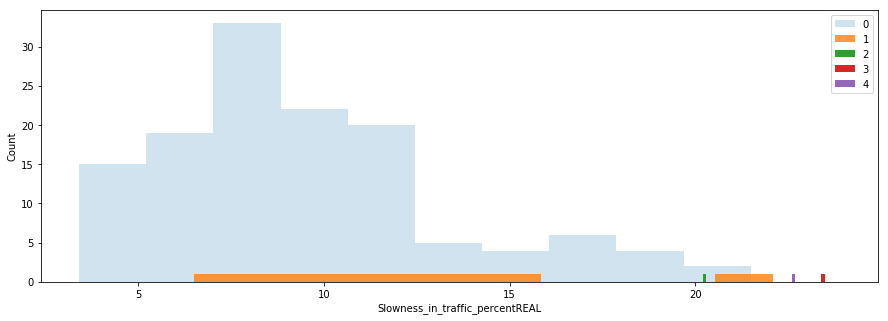

In [82]:
#Lack_of_electricity Histogram bin
a = data.loc[data['Lack_of_electricity'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Lack_of_electricity'] == 1, 'Slowness_in_traffic_percentREAL']
c = data.loc[data['Lack_of_electricity'] == 2, 'Slowness_in_traffic_percentREAL']
d = data.loc[data['Lack_of_electricity'] == 3, 'Slowness_in_traffic_percentREAL']
e = data.loc[data['Lack_of_electricity'] == 4, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.hist(c,alpha=1,label='2')
plt.hist(d,alpha=1,label='3')
plt.hist(e,alpha=1,label='4')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

## 3.Accident_victim

In [73]:
data['Accident_victim'].unique()

array([0, 1, 2, 3], dtype=object)

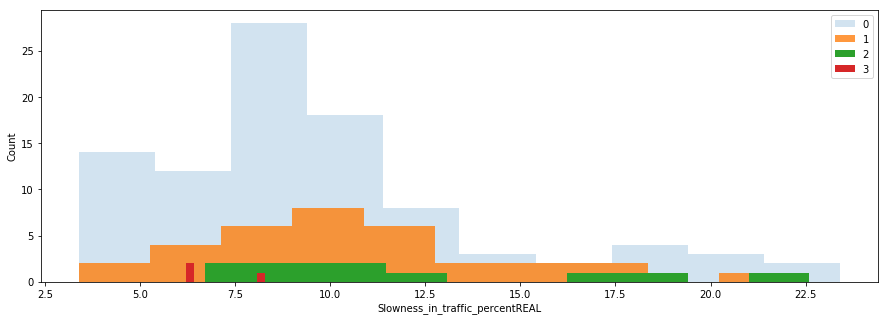

In [74]:
#Accident_victim Histogram bin
a = data.loc[data['Accident_victim'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Accident_victim'] == 1, 'Slowness_in_traffic_percentREAL']
c = data.loc[data['Accident_victim'] == 2, 'Slowness_in_traffic_percentREAL']
d = data.loc[data['Accident_victim'] == 3, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.hist(c,alpha=1,label='2')
plt.hist(d,alpha=1,label='3')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

In [76]:
data.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Occurrence_involving_freight',
       'Incident_involving_dangerous_freight', 'Lack_of_electricity', 'Fire',
       'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore', 'day', 'fireVehicle_NO',
       'fireVehicle_YES', 'Slowness_in_traffic_percentREAL'],
      dtype='object')

## 4.Intermittent_Semaphore

In [77]:
data['Intermittent_Semaphore'].unique()

array([0, 1], dtype=object)

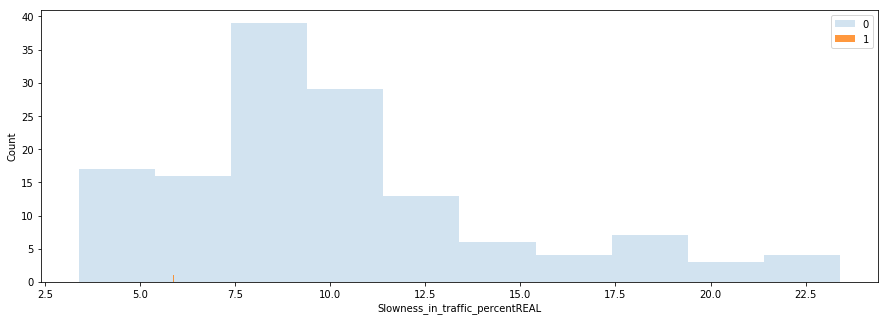

In [78]:
#Accident_victim Histogram bin
a = data.loc[data['Intermittent_Semaphore'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Intermittent_Semaphore'] == 1, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

## 5.Semaphore_off

In [79]:
data['Semaphore_off'].unique()

array([0, 1, 2, 4], dtype=object)

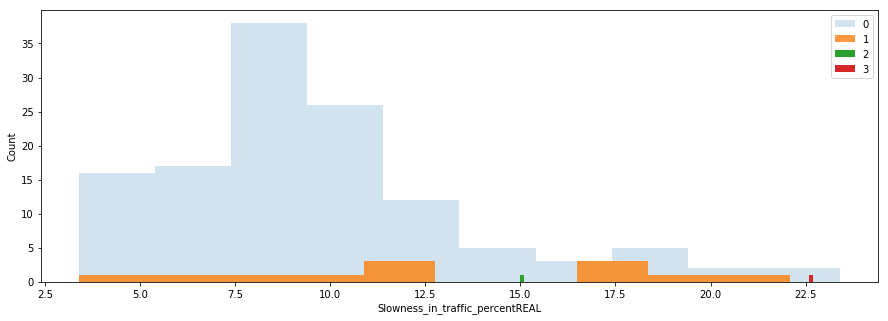

In [80]:
#Accident_victim Histogram bin
a = data.loc[data['Semaphore_off'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Semaphore_off'] == 1, 'Slowness_in_traffic_percentREAL']
c = data.loc[data['Semaphore_off'] == 2, 'Slowness_in_traffic_percentREAL']
d = data.loc[data['Semaphore_off'] == 4, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.hist(c,alpha=1,label='2')
plt.hist(d,alpha=1,label='3')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

## 5.Broken_Truck

In [81]:
data['Broken_Truck'].unique()

array([0, 2, 1, 5, 4, 3], dtype=object)

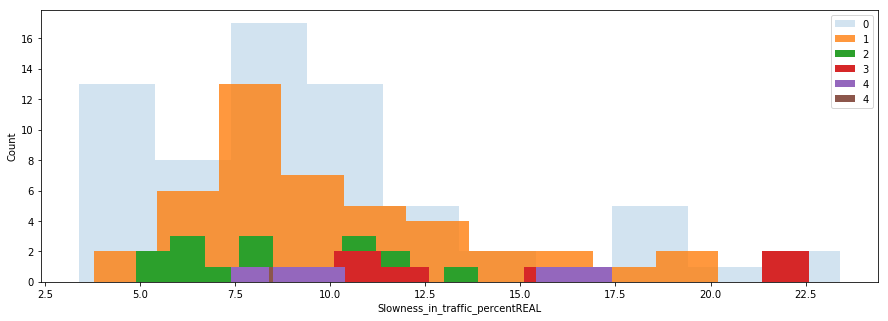

In [83]:
#Lack_of_electricity Histogram bin
a = data.loc[data['Broken_Truck'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Broken_Truck'] == 1, 'Slowness_in_traffic_percentREAL']
c = data.loc[data['Broken_Truck'] == 2, 'Slowness_in_traffic_percentREAL']
d = data.loc[data['Broken_Truck'] == 3, 'Slowness_in_traffic_percentREAL']
e = data.loc[data['Broken_Truck'] == 4, 'Slowness_in_traffic_percentREAL']
f = data.loc[data['Broken_Truck'] == 5, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.hist(c,alpha=1,label='2')
plt.hist(d,alpha=1,label='3')
plt.hist(e,alpha=1,label='4')
plt.hist(f,alpha=1,label='4')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

## 5.Fire

In [87]:
data['Fire'].unique()

array([0, 1], dtype=object)

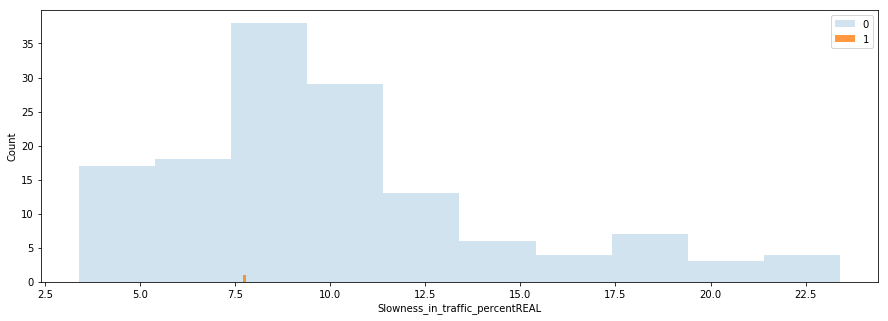

In [88]:
#Fire Histogram bin
a = data.loc[data['Fire'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Fire'] == 1, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

## 6.Manifestations

In [90]:
data['Manifestations'].unique()

array([0, 1], dtype=object)

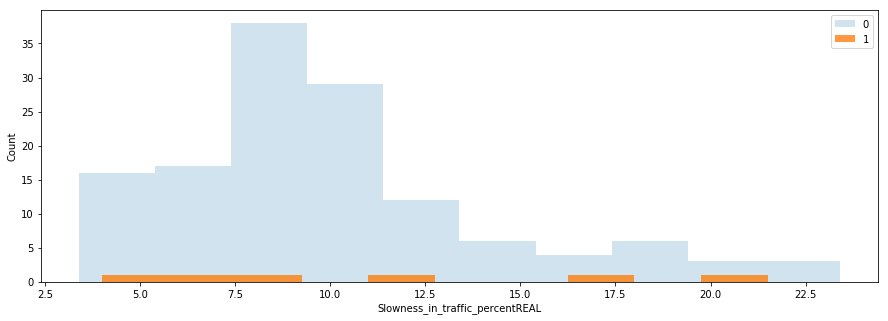

In [91]:
#Manifestations Histogram bin
a = data.loc[data['Manifestations'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Manifestations'] == 1, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

## 7.Defect_in_the_network_of_trolleybuses

In [94]:
data.Defect_in_the_network_of_trolleybuses.unique()

array([0, 1, 3, 2], dtype=object)

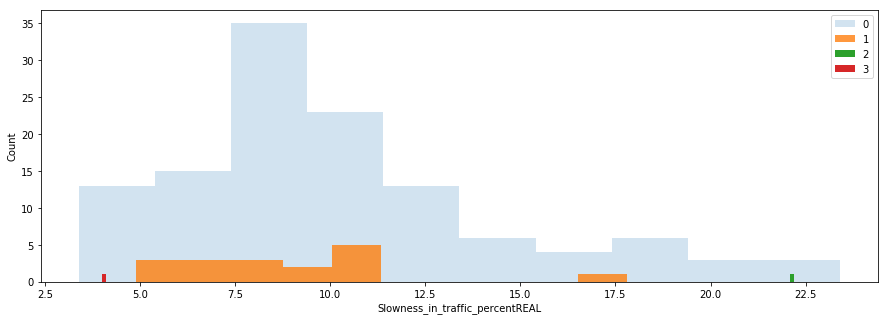

In [95]:
#Defect_in_the_network_of_trolleybuses Histogram bin
a = data.loc[data['Defect_in_the_network_of_trolleybuses'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Defect_in_the_network_of_trolleybuses'] == 1, 'Slowness_in_traffic_percentREAL']
c = data.loc[data['Defect_in_the_network_of_trolleybuses'] == 2, 'Slowness_in_traffic_percentREAL']
d = data.loc[data['Defect_in_the_network_of_trolleybuses'] == 3, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.hist(c,alpha=1,label='2')
plt.hist(d,alpha=1,label='3')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

## 8.Incident_involving_dangerous_freight

In [97]:
data.Incident_involving_dangerous_freight.unique()

array([0, 1], dtype=object)

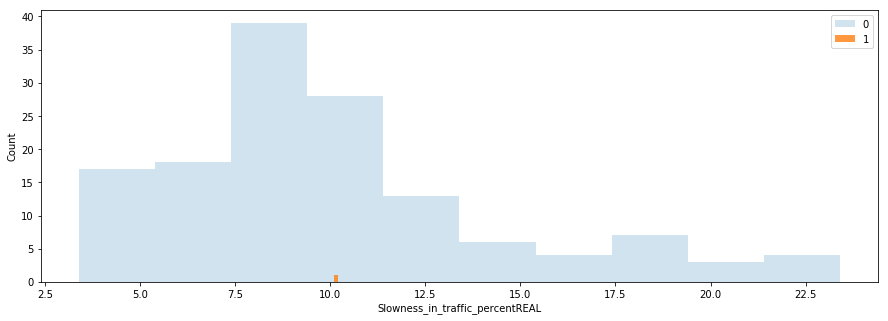

In [98]:
#Incident_involving_dangerous_freight Histogram bin
a = data.loc[data['Incident_involving_dangerous_freight'] == 0, 'Slowness_in_traffic_percentREAL']
b = data.loc[data['Incident_involving_dangerous_freight'] == 1, 'Slowness_in_traffic_percentREAL']
plt.figure(figsize=(15, 5))
plt.hist(a,alpha=0.2,label='0')
plt.hist(b,alpha=0.8,label='1')
plt.legend(loc='upper right')
plt.xlabel('Slowness_in_traffic_percentREAL')
plt.ylabel('Count')
plt.show();

In [99]:
data.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Occurrence_involving_freight',
       'Incident_involving_dangerous_freight', 'Lack_of_electricity', 'Fire',
       'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore', 'day', 'fireVehicle_NO',
       'fireVehicle_YES', 'Slowness_in_traffic_percentREAL'],
      dtype='object')

In [100]:
data.shape

(140, 20)

# CONCLUSION ON Feature OBSERVATION

#### Broken_Truck, Semaphore_off, Accident_victim, Lack_of_electricity, Point_of_flooding, Defect_in_the_network_of_trolleybuses has dominant impact on the dependent variable Slowness_in_traffic

## PCA 

In [126]:
test = data.loc[:, ~data.columns.isin(['Hour'])]

In [122]:
from sklearn.preprocessing import scale
test = pd.DataFrame(scale(test), index=df.index, columns=df.columns)

/Users/srajathii/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by the scale function.
  


In [123]:
from sklearn.decomposition import PCA
pca=PCA().fit(test)
print("explained_variance_ratio",pca.explained_variance_ratio_)
print("components",pca.components_)
pca.transform(test)

explained_variance_ratio [1.31362203e-01 1.08225803e-01 8.64225668e-02 7.70857830e-02
 6.34566224e-02 6.19662278e-02 5.81649353e-02 5.44851244e-02
 5.30105439e-02 5.05926356e-02 4.67117411e-02 4.59384962e-02
 3.66348666e-02 3.34507822e-02 3.16681030e-02 2.62617041e-02
 1.85835862e-02 1.59782749e-02 1.65955098e-32]
components [[ 1.06468430e-01  2.81263085e-01 -4.97189463e-02  1.94457806e-01
   2.41619208e-02  1.03344735e-01  3.03625235e-02  4.32623262e-01
  -4.24355694e-02  3.80343794e-01  1.23595033e-01  1.47052572e-01
  -6.57994437e-02  4.45274849e-01 -7.08980821e-02  2.37935295e-01
  -8.52047049e-02  8.52047049e-02  4.55850833e-01]
 [ 8.22577930e-02 -3.53741865e-02 -6.13205067e-03  5.70544462e-02
  -4.04411678e-02 -5.88568330e-02  1.29764568e-02 -6.17746463e-02
  -7.54784618e-03 -8.19387607e-02 -1.01890562e-01 -9.78898720e-02
  -3.81549651e-02 -9.19787071e-02 -1.68368573e-02 -1.17333744e-01
  -6.79881548e-01  6.79881548e-01  6.65277830e-02]
 [ 3.79542252e-01  2.70303712e-01  1.055418

array([[-1.98810480e+00,  1.63871218e-02, -4.55362596e-01, ...,
         2.51374172e-01,  4.93179091e-01, -6.52942948e-17],
       [-1.45565874e+00,  8.80364042e-02, -1.10106954e+00, ...,
        -7.46978145e-02,  2.97006312e-02, -5.86669159e-17],
       [-1.23345319e+00,  1.20465527e-01, -1.16573581e+00, ...,
         2.06208035e-02,  3.05960106e-01, -5.30999177e-17],
       ...,
       [ 1.09582169e+00,  2.12572422e-01,  3.09219183e-01, ...,
        -2.16437364e-01,  1.43826523e-01, -7.09252956e-16],
       [ 2.96920486e+00, -9.09656807e-01,  1.63845148e+00, ...,
        -5.21377174e-01,  5.35233500e-01,  3.65480313e-16],
       [-2.00709179e-01, -1.58900122e-01, -2.82380740e-01, ...,
         2.92190550e-02, -2.35149377e-01, -2.32700007e-17]])

### Train Test Split

In [115]:
# splitting the dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [116]:
X_train.shape

(112, 19)

In [117]:
Y_train.shape

(112, 1)

In [118]:
X_test.shape

(28, 19)

In [142]:
import fbprophet

In [140]:
data['Hour'] = data.timestamp

In [144]:
data.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Occurrence_involving_freight',
       'Incident_involving_dangerous_freight', 'Lack_of_electricity', 'Fire',
       'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore', 'day', 'fireVehicle_NO',
       'fireVehicle_YES', 'Slowness_in_traffic_percentREAL', 'timestamp'],
      dtype='object')

## MODEL 1 -  Fb Prophet - Forecast TimeSeries

In [145]:
data = data.rename(columns={'Hour': 'ds', 'Slowness_in_traffic_percentREAL': 'y'})
# # Put market cap in billions
# gm['y'] = gm['y'] / 1e9
# Make the prophet model and fit on the data
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/srajathii/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [147]:
# Make a future dataframe for 2 years
gm_forecast = gm_prophet.make_future_dataframe(periods=10, freq='H')
# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

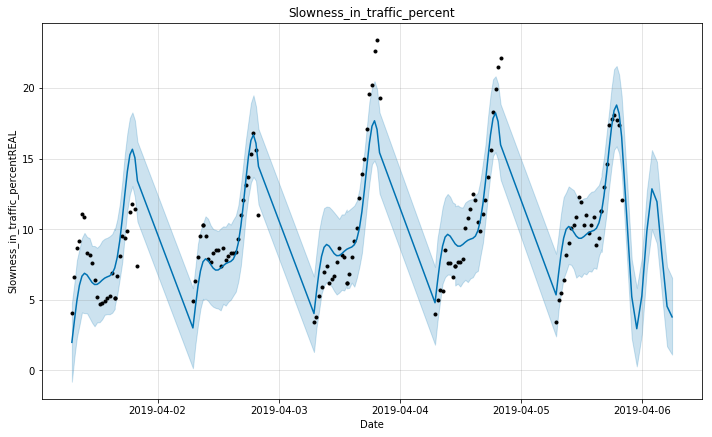

In [148]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Slowness_in_traffic_percentREAL')
plt.title('Slowness_in_traffic_percent');

## MODEL 2 - Linear Regression

In [152]:
X.Hour = X.Hour.str.replace('-','.')
X.Hour = X.Hour.astype(float)

In [158]:
from sklearn import datasets, linear_model

#Create linear Regression Object
regr=linear_model.LinearRegression(fit_intercept=True)


#Train the model using training sets
regr.fit(X,Y['Slowness_in_traffic_percentREAL'])

#Make predictions using test set
y_pred=regr.predict(X)

#The coefficients
print('coefficients :\n ',regr.coef_)


coefficients :
  [ 0.6506767   0.35388954 -0.07859211 -0.47823172 -0.32730626 -0.10749337
 -1.32029441 -0.62401294  1.78671528 -0.76951779  1.31993565  1.14718109
 -1.21858947 -0.86173762  0.22500696 -1.20561236  0.84646406 -2.07007621
  2.07007621]


In [157]:
#The mean squared error
print("MSE : %.2f"
     % np.mean((y_pred-Y['Slowness_in_traffic_percentREAL'])**2))

MSE : 5.43


## RFE - Feature ranking with recursive feature elimination

In [159]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [160]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, Y)

/Users/srajathii/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [161]:
selector.support_


array([False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
        True])

In [162]:
selector.ranking_

array([ 3,  5, 15,  9,  6, 14, 10,  8,  1, 12,  1, 11,  1, 13,  7,  4,  2,
        1,  1])

In [163]:
X.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Occurrence_involving_freight',
       'Incident_involving_dangerous_freight', 'Lack_of_electricity', 'Fire',
       'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore', 'day', 'fireVehicle_NO',
       'fireVehicle_YES'],
      dtype='object')

In [174]:
col = X.columns
rank = selector.ranking_

range(0, 19)

In [177]:
print("****************")
print("Feature   - Rank")
print("****************")
for i in range(0,X.columns.size):
    print(col[i]," - ",rank[i])

****************
Feature   - Rank
****************
Hour  -  3
Immobilized_bus  -  5
Broken_Truck  -  15
Vehicle_excess  -  9
Accident_victim  -  6
Running_over  -  14
Occurrence_involving_freight  -  10
Incident_involving_dangerous_freight  -  8
Lack_of_electricity  -  1
Fire  -  12
Point_of_flooding  -  1
Manifestations  -  11
Defect_in_the_network_of_trolleybuses  -  1
Tree_on_the_road  -  13
Semaphore_off  -  7
Intermittent_Semaphore  -  4
day  -  2
fireVehicle_NO  -  1
fireVehicle_YES  -  1
